In [19]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(data_url)#.fillna(0).set_index("date")

In [20]:
df = df.fillna(0).set_index("date")
df.index = pd.to_datetime(df.index) 
dg = df[["iso_code","new_cases", "total_cases"]]
#dh = dg[dg["iso_code"].isin(("AUT","USA","ITA"))]
dg[dg["iso_code"]=="USA"]

,iso_code,new_cases,total_cases
date,,,
2020-01-22,USA,0.0,1.0
2020-01-23,USA,0.0,1.0
2020-01-24,USA,1.0,2.0
2020-01-25,USA,0.0,2.0
2020-01-26,USA,3.0,5.0
...,...,...,...
2021-07-29,USA,78170.0,34750860.0
2021-07-30,USA,194608.0,34945468.0
2021-07-31,USA,32808.0,34978276.0


In [21]:
#available states
states = ["AUT","USA","ITA","DNK","SSD"]
states = ["USA"]
#states = dg["iso_code"].unique()[:3].tolist()
states

['USA']

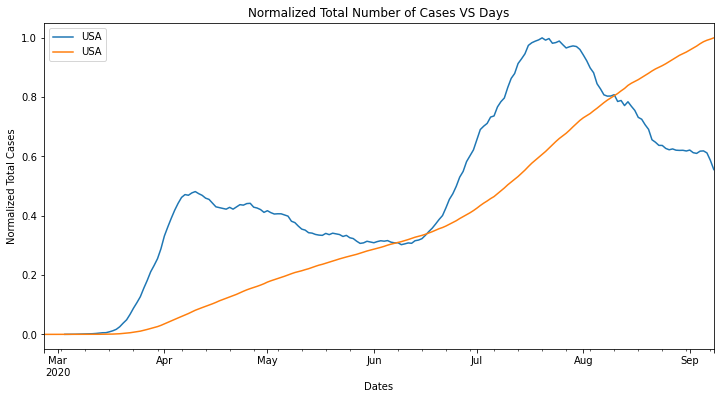

In [24]:
start_date = "2020-02-25"; end_date = "2020-09-08"

def dfstate(state, dg, st_dt, end_dt, ax):
    dfstat = dg[dg["iso_code"]==state]
    mask = (dfstat.index > start_date) & (dfstat.index <= end_date) 
    dfstat = dfstat.loc[mask]
    dfstat["MA_dni_"+state] = dfstat["new_cases"].rolling(window = 7).mean()
    dfstat = dfstat.iloc[:,1:].apply(lambda x: x / x.max(), axis=0)
    dfstat["MA_dni_"+state].plot(ax = axs, label = state)
    dfstat["total_cases"].plot(ax = axs, label = state)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 6))
for state in states:
    dfstate(state, dg = dg, st_dt = start_date, end_dt = end_date, ax = axs)
plt.xlabel("Dates"); plt.ylabel("Normalized Total Cases"); plt.title("Normalized Total Number of Cases VS Days")
plt.legend()
plt.show()

Miscellanea below

In [84]:

dfstat = dh[dh["iso_code"]=="AUT"]
start_date = "2020-02-25"; end_date = "2021-05-08"
mask = (dfstat.index > start_date) & (dfstat.index <= end_date) 
dfstat = dfstat.loc[mask]
dfstat = dfstat.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)
dfstat

,new_cases,total_cases
date,,
2020-02-26,0.000000,0.000003
2020-02-27,0.000104,0.000005
2020-02-28,0.000000,0.000005
2020-02-29,0.000626,0.000014
2020-03-01,0.000522,0.000022
...,...,...
2021-05-04,0.145420,0.991342
2021-05-05,0.171500,0.993951
2021-05-06,0.129877,0.995927


In [85]:
dfusa = dh[dh["iso_code"]=="USA"]
mask = (dfusa.index > start_date) & (dfusa.index <= end_date) 
dfusa = dfusa.loc[mask]
dfusa = dfusa.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)
dfusa

,new_cases,total_cases
date,,
2020-02-26,0.000000,4.894323e-07
2020-02-27,0.000003,5.200218e-07
2020-02-28,0.000000,5.200218e-07
2020-02-29,0.000027,7.647380e-07
2020-03-01,0.000023,9.788646e-07
...,...,...
2021-05-04,0.135535,9.946754e-01
2021-05-05,0.148784,9.960429e-01
2021-05-06,0.158280,9.974976e-01


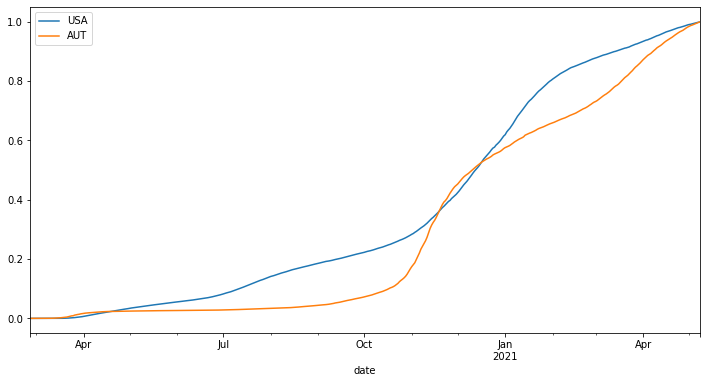

In [86]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 6))
#dfusa = dh[dh["iso_code"]=="USA"]
#dfstatt = dh[dh["iso_code"]=="AUT"]
dfusa["total_cases"].plot(ax = axs, label = "USA")
dfstat["total_cases"].plot(ax = axs, label = "AUT")  
plt.legend()